<a href="https://colab.research.google.com/github/ankitbittu/Ted-talk-views-prediction/blob/main/Copy_of_Ted_talk_views_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.
 
Founded in 1984 by Richard Salman as a nonprofit organization 
that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates. 

The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (7,4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings('ignore')

In [88]:
from wordcloud import WordCloud,ImageColorGenerator
pd.plotting.register_matplotlib_converters()
import calendar

In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath = '/content/drive/MyDrive/Capstone 3/Copy of data_ted_talks.csv'
df = pd.read_csv(filepath)

In [ ]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [ ]:
df_copy = df.copy()

Check for dduplicate values

In [ ]:
df_copy.shape

(4005, 19)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
df_copy.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [ ]:
df_copy.describe(include='object').T

,count,unique,top,freq
title,4005,4005,Philosophy in prison,1
speaker_1,4005,3274,Alex Gendler,34
all_speakers,4001,3306,{0: 'Alex Gendler'},34
occupations,3483,2049,{0: ['writer']},53
about_speakers,3502,2977,{0: 'Alex Rosenthal takes everyday experiences...,10
recorded_date,4004,1334,2017-04-24,97
published_date,4005,2962,2017-09-07,27
event,4005,459,TED-Ed,556
native_lang,4005,12,en,3957
available_lang,4005,3902,['en'],24


In [ ]:
df_copy.duplicated().value_counts()


False    4005
dtype: int64

there is no duplicated rows in the dataset 



In [ ]:
df_copy.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [ ]:
(df_copy.isnull().sum()/df_copy.shape[0])*100

talk_id            0.000000
title              0.000000
speaker_1          0.000000
all_speakers       0.099875
occupations       13.033708
about_speakers    12.559301
views              0.000000
recorded_date      0.024969
published_date     0.000000
event              0.000000
native_lang        0.000000
available_lang     0.000000
comments          16.354557
duration           0.000000
topics             0.000000
related_talks      0.000000
url                0.000000
description        0.000000
transcript         0.000000
dtype: float64

*  There are  missing value in the data 
*  By looking at the info of the dataset we can get a rough idea on the numeric and the string columns

In [ ]:
popular_talks = df_copy[['title', 'speaker_1', 'views', 'recorded_date', 'published_date']].sort_values('views', ascending=False)[:15]
popular_talks

,title,speaker_1,views,recorded_date,published_date
4,Do schools kill creativity?,Sir Ken Robinson,65051954,2006-02-25,2006-06-27
1296,Your body language may shape who you are,Amy Cuddy,57074270,2012-06-26,2012-10-01
2062,This is what happens when you reply to spam email,James Veitch,56932551,2015-12-08,2016-01-08
646,How great leaders inspire action,Simon Sinek,49730580,2009-09-17,2010-05-04
796,The power of vulnerability,Brené Brown,47544833,2010-06-06,2010-12-23
1724,How to speak so that people want to listen,Julian Treasure,41504331,2013-06-10,2014-06-27
2108,Inside the mind of a master procrastinator,Tim Urban,37976820,2016-02-16,2016-03-15
1366,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,33874546,2012-10-27,2013-01-16
2724,My philosophy for a happy life,Sam Berns,33691484,2013-10-25,2018-03-28
1898,The next outbreak? We're not ready,Bill Gates,33521780,2015-03-18,2015-04-03


According to number of views, 

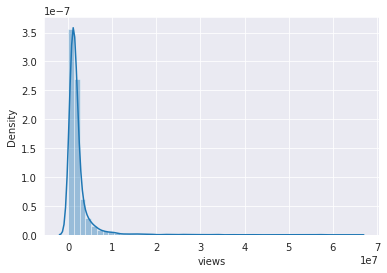

In [ ]:
sns.distplot(df_copy['views'])

In [ ]:
df_copy['views'].describe()

count    4.005000e+03
mean     2.148006e+06
std      3.451226e+06
min      0.000000e+00
25%      8.820690e+05
50%      1.375508e+06
75%      2.133110e+06
max      6.505195e+07
Name: views, dtype: float64

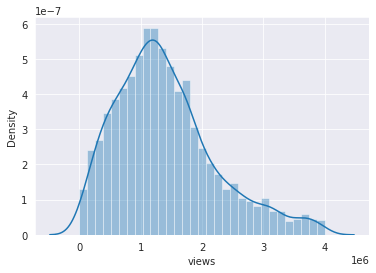

In [ ]:
sns.distplot(df_copy[df_copy['views'] < 4e6]['views'])

Most of the Ted talk videos have less than 4 million views.

In [ ]:
df_copy['comments'].describe()

count    3350.000000
mean      161.997015
std       268.838922
min         0.000000
25%        38.000000
50%        89.000000
75%       188.000000
max      6449.000000
Name: comments, dtype: float64

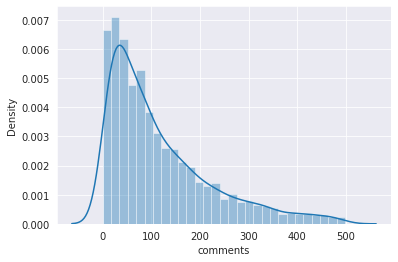

In [ ]:
sns.distplot(df_copy[df_copy['comments'] < 500]['comments'])

Most of the videos have less than 500 comments.

In [ ]:
df_copy[['views', 'comments']].corr()

,views,comments
views,1.000000,0.500748
comments,0.500748,1.000000


In [ ]:
df_copy[['title', 'speaker_1','views', 'comments']].sort_values('comments', ascending=False).head(10)

,title,speaker_1,views,comments
94,Militant atheism,Richard Dawkins,5788514,6449.0
4,Do schools kill creativity?,Sir Ken Robinson,65051954,4931.0
617,Science can answer moral questions,Sam Harris,6331825,3424.0
1735,How do you explain consciousness?,David Chalmers,2910843,3006.0
197,My stroke of insight,Jill Bolte Taylor,26553231,2984.0
1296,Your body language may shape who you are,Amy Cuddy,57074270,2633.0
911,Taking imagination seriously,Janet Echelman,2297341,2529.0
799,On reading the Koran,Lesley Hazleton,2269271,2463.0
631,The danger of science denial,Michael Specter,2170700,2366.0
796,The power of vulnerability,Brené Brown,47544833,2209.0


According to number of comments,

In [ ]:
df_copy.groupby('speaker_1').agg({'views':'sum'}).sort_values(by='views',ascending=False).head(10)

,views
speaker_1,
Alex Gendler,117619583
Sir Ken Robinson,84380518
James Veitch,78843641
Simon Sinek,62661183
Brené Brown,61285977
Bill Gates,57107176
Amy Cuddy,57074270
Julian Treasure,54799681
Hans Rosling,39871561


In [146]:
df_copy['topics'] = df_copy.apply(lambda row: eval(row['topics']), axis=1)

In [ ]:
df_copy['topics']

0       [alternative energy, cars, climate change, cul...
1       [Africa, Asia, Google, demo, economics, global...
2       [computers, entertainment, interface design, m...
3       [MacArthur grant, activism, business, cities, ...
4       [children, creativity, culture, dance, educati...
                              ...                        
4000    [activism, data, technology, mental health, so...
4001    [TED-Ed, education, history, animation, intell...
4002         [society, law, policy, justice system, TEDx]
4003    [TED-Ed, education, animation, United States, ...
4004    [animals, TED-Ed, animation, oceans, science, ...
Name: topics, Length: 4005, dtype: object

In [ ]:
df_copy['occupations'][0]

"{0: ['climate advocate']}"

Treating Nan values in Occupations

In [ ]:
#replacing Nan values of occupations column with other 
for index, row in df_copy.iterrows():
    if pd.isnull(row['occupations']):
        df_copy['occupations'][index] = str({0:'Miscellaneous'})

In [ ]:
df_copy['occupations'] = df_copy.apply(lambda row: eval(row['occupations']), axis=1)

In [ ]:
df_copy['occupation'] = 'Miscellaneous'
#iterating through the each row and extracting occupations of speakers
for index, row in df_copy.iterrows():
    occup_list=list(row['occupations'].values())[0][0]
    df_copy.loc[index,'occupation'] = str(occup_list)

In [ ]:
df_copy.drop('occupations', axis=1, inplace=True)

In [ ]:
speaker_df.index[0]

'Alex Gendler'

In [ ]:
df_copy['event'].nunique()

459

In [ ]:
# group the data by the event and calculate the sum
sums=df_copy.groupby("event")["views"].agg(["sum","mean","count"]).sort_values("sum",ascending=False) .nlargest(10,"sum")
sums

,sum,mean,count
event,,,
TED-Ed,1145357780,2.059996e+06,556
TED2015,247702961,3.302706e+06,75
TED2014,240295871,2.860665e+06,84
TEDGlobal 2013,235410234,3.513586e+06,67
TED2017,227847725,2.373414e+06,96
TED2016,227358612,3.031448e+06,75
TED2013,225967516,3.012900e+06,75
TED2012,197746106,3.042248e+06,65
TED2018,196346377,2.045275e+06,96


In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots

text=(sums["mean"]/1000000).round(2).astype(str)+" M"
fig=px.bar(sums,x=sums.index,y="mean",
           labels={"y":"Sum & mean & number of talks","x":"event"},
      title="Average number of views for event",
       color_discrete_sequence=["#154360"],
           text=text 
      )
fig.show()

In [ ]:
sumss=df_copy.groupby("event")["views"].agg(["sum","mean","count"]).sort_values("count",ascending=False) .nlargest(10,"count")
sumss

,sum,mean,count
event,,,
TED-Ed,1145357780,2.059996e+06,556
TED2018,196346377,2.045275e+06,96
TED2017,227847725,2.373414e+06,96
TED2019,160467082,1.763375e+06,91
TED2014,240295871,2.860665e+06,84
TED2009,191190144,2.360372e+06,81
TED2013,225967516,3.012900e+06,75
TED2016,227358612,3.031448e+06,75
TED2015,247702961,3.302706e+06,75


In [ ]:

text=(sumss["count"]).astype(str)
fig=px.bar(sumss,x=sumss.index,y="count",
           labels={"y":"Number of events","x":"event"},
      title="Count of particular event",
       color_discrete_sequence=["#154360"],
           text=text 
      )
fig.show()

In [ ]:
sums1=df_copy.groupby("speaker_1")["views"].agg(["sum","mean","count"]).sort_values("sum",ascending=False) .nlargest(10,"sum")
sums1

,sum,mean,count
speaker_1,,,
Alex Gendler,117619583,3.459400e+06,34
Sir Ken Robinson,84380518,2.812684e+07,3
James Veitch,78843641,3.942182e+07,2
Simon Sinek,62661183,3.133059e+07,2
Brené Brown,61285977,3.064299e+07,2
Bill Gates,57107176,9.517863e+06,6
Amy Cuddy,57074270,5.707427e+07,1
Julian Treasure,54799681,1.095994e+07,5
Hans Rosling,39871561,3.987156e+06,10


In [ ]:
text=(sums1["mean"]/1000000).round(2).astype(str)+" M"
fig=px.bar(sums1,x=sums1.index,y="mean",
           labels={"y":"mean","x":"event"},
      title="avg number of views in each video of speaker",
       color_discrete_sequence=["#154360"],
           text=text 
      )
fig.show()

In [ ]:
sums2=df_copy.groupby("speaker_1")["views"].agg(["sum","mean","count"]).sort_values("count",ascending=False) .nlargest(10,"count")
sums2

,sum,mean,count
speaker_1,,,
Alex Gendler,117619583,3.459400e+06,34
Iseult Gillespie,16588948,8.731025e+05,19
Emma Bryce,24554552,2.046213e+06,12
Daniel Finkel,15897420,1.445220e+06,11
Hans Rosling,39871561,3.987156e+06,10
Alex Rosenthal,3343962,3.343962e+05,10
Juan Enriquez,18311605,2.034623e+06,9
Greg Gage,18359012,2.039890e+06,9
Chris Anderson,32598679,4.074835e+06,8


In [ ]:
text=(sums2["count"])
fig=px.bar(sums2,x=sums2.index,y="count",
           labels={"y":"Number of events","x":"event"},
      title="Count of particular event",
       color_discrete_sequence=["#154360"],
           text=text)
fig.show()

In [ ]:
# get the value counts of each occupation
df_occ=df_copy[df_copy["occupation"]!='M']
occ = pd.DataFrame(df_occ['occupation'].value_counts().sort_values(ascending=False).nlargest(40))
occ

,occupation
writer,99
author,74
journalist,68
artist,67
entrepreneur,61
designer,56
neuroscientist,47
architect,46
inventor,41
psychologist,38


In [ ]:
df_occ.groupby('occupation')['views'].agg('sum').sort_values(ascending=False)

occupation
writer                                    326607634
author                                    264792692
psychologist                              172189895
journalist                                153759889
neuroscientist                            131071800
                                            ...    
assistant professor of neurobiology           16466
redistricting advocate                        15850
international trade expert                    13933
técnica agropecuaria y agroalimentaria            0
productor audiovisual                             0
Name: views, Length: 1551, dtype: int64

In [ ]:
df_copy[df_copy["occupation"]!='O']['views'].

SyntaxError: ignored

In [ ]:
text=(occ["occupation"])
fig=px.bar(occ,x=occ.index,y="occupation",
           labels={'occupation':"Total no. of Individual profession","x":"Occupation"},
      title="Count of particular occupation",
       color_discrete_sequence=["#154360"],
           text=text)
fig.show()

In [ ]:
#printing the value counts of native_lang column
native = pd.DataFrame(df_copy.native_lang.value_counts())
native

,native_lang
en,3957
es,27
fr,9
ja,3
hi,2
pt-br,1
ko,1
de,1
pt,1
zh-cn,1


In [ ]:
text=(native["native_lang"])
fig=px.bar(native,x=native.index,y="native_lang",
           labels={"native_lang":"Count","x":"native_lang"},
      title="Count of particular language",text=text)
fig.show()

In [ ]:
df_copy['occupation']

0                           climate advocate
1       global health expert; data visionary
2                       technology columnist
3         activist for environmental justice
4                                     author
                        ...                 
4000                         health activist
4001                                       M
4002                          law researcher
4003                                       M
4004                                       M
Name: occupation, Length: 4005, dtype: object

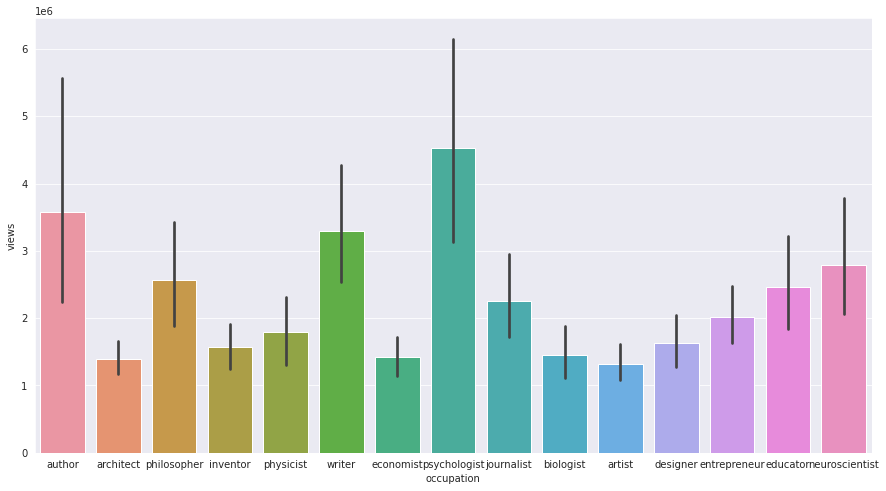

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='occupation', y='views', data=df_copy[df_copy['occupation'].isin(occ.head(15).index)])

Psychologists are having more number of views

In [ ]:
#applying strptime on published_date column
import datetime
df_copy['published_date'] = df_copy['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

In [ ]:
#extracting release day, month and year from the published date column
df_copy['release_day'] = df_copy['published_date'].apply(lambda x: x.weekday())
df_copy['release_month']=df_copy['published_date'].apply(lambda x: x.month)
df_copy['release_year'] = df_copy['published_date'].apply(lambda x: x.year)

In [ ]:
df_copy['release_year'] = df_copy['release_year'].astype('int')

In [ ]:
df_copy['release_month'] = df_copy['release_month'].astype('int')

In [ ]:
df_copy['months_ago'] = ((2020 - df_copy['release_year'])*12 + df_copy['release_month'])

In [ ]:
#encoding of release_day column with corresponding week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df_copy['release_day']=df_copy['release_day'].map(week_day)

In [ ]:
#encoding of release_month column with corresponding month name
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df_copy['release_month']=df_copy['release_month'].map(month_dict)

In [ ]:
#checking the day of the month having maximum release date 
freq_rel_day=df_copy[['release_day','views']].groupby('release_day').agg({'views' : 'count'}).sort_values(by='views',ascending=False)
freq_rel_day.reset_index(inplace=True)
freq_rel_day

,release_day,views
0,Tuesday,857
1,Thursday,832
2,Friday,789
3,Monday,727
4,Wednesday,703
5,Sunday,55
6,Saturday,42


In [ ]:
text=(freq_rel_day["views"])
fig=px.bar(freq_rel_day,x='release_day',y='views',
           labels={"views":"No. of ted-talks videos released","x":"day"},
      title="Release on particular day",color_discrete_sequence=["#154360"], text=text)
fig.show()

In [ ]:
#checking the day of the month having maximum release date 
popular_rel_day=df_copy[['release_day','views']].groupby('release_day').agg({'views' : 'mean'}).sort_values(by='views',ascending=False)
popular_rel_day.reset_index(inplace=True)
popular_rel_day

,release_day,views
0,Friday,2.693812e+06
1,Wednesday,2.293402e+06
2,Tuesday,2.025352e+06
3,Monday,1.953866e+06
4,Thursday,1.907994e+06
5,Sunday,1.458068e+06
6,Saturday,9.821678e+05


In [ ]:
text=(popular_rel_day["views"]/1000000).round(2).astype(str)+" M"
fig=px.bar(popular_rel_day,x='release_day',y='views',
           labels={"y":"No. of ted-talks released","x":"day"},
      title="Release on particular day",color_discrete_sequence=["#154360"], text=text)
fig.show()

In [ ]:
month_wise_ted_talks = pd.DataFrame(df_copy['release_month'].value_counts())
month_wise_ted_talks

,release_month
April,423
March,419
Feb,412
Oct,350
Jan,348
Sep,347
May,312
June,310
Nov,305
July,278


In [ ]:
text=(month_wise_ted_talks["release_month"])
fig=px.bar(month_wise_ted_talks,x=month_wise_ted_talks.index,y='release_month',
           labels={"y":"Ted-talk videos","x":"month"},
      title="Release on particular month",color_discrete_sequence=["#154360"], text=text)
fig.show()

In [ ]:
#checking years having maximum release 
freq_rel_year=df_copy[['release_year','views']].groupby('release_year')['views'].agg(['count','mean']).sort_values('count',ascending=False)
freq_rel_year.reset_index(inplace=True)
freq_rel_year

,release_year,count,mean
0,2019,702,1.939608e+06
1,2018,477,1.826209e+06
2,2017,315,2.160378e+06
3,2012,303,2.196281e+06
4,2011,255,1.932456e+06
5,2013,242,3.012435e+06
6,2016,242,2.734725e+06
7,2014,240,2.423564e+06
8,2010,230,2.188767e+06
9,2015,220,2.806775e+06


In [ ]:
text=(freq_rel_year["count"])
fig=px.bar(freq_rel_year,x='release_year',y='count',
           labels={"y":"Ted-talk videos","x":"year"},
      title="Release in particular year",color_discrete_sequence=["#154360"], text=text)
fig.show()

In [ ]:
text=((freq_rel_year["mean"])/1000000).round(2).astype(str)+" M"
fig=px.bar(freq_rel_year,x='release_year',y='mean',
           labels={"mean":"avg views","x":"year"},
      title="Avg view in particular year",color_discrete_sequence=["#154360"], text=text)
fig.show()

In [ ]:
df_copy['topics'][4004]

['animals',
 'TED-Ed',
 'animation',
 'oceans',
 'science',
 'education',
 'biology',
 'climate change']

In [ ]:
topics_df = pd.DataFrame(df_copy['topics'].explode().value_counts()).reset_index()

In [ ]:
topics_df

,index,topics
0,science,993
1,technology,979
2,culture,680
3,TEDx,581
4,global issues,574
...,...,...
452,skateboarding,1
453,rap,1
454,cloud,1
455,exoskeleton,1


In [ ]:
x_ = topics_df.head(20)
x_

,index,topics
0,science,993
1,technology,979
2,culture,680
3,TEDx,581
4,global issues,574
5,TED-Ed,563
6,society,557
7,design,518
8,social change,512
9,animation,487


In [ ]:
text=(x_["topics"])
fig=px.bar(x_,x='index',y='topics',
           labels={"topics":"Count","x":"Topic"},
      title="Topic wise videos",color_discrete_sequence=["#154360"], text=text)
fig.show()

#Number of Languages:

In [ ]:
df_copy['available_lang'] = df_copy.apply(lambda x : eval(x['available_lang']),axis=1)

In [ ]:
df_copy['available_lang']

0       [ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...
1       [ar, az, bg, bn, bs, cs, da, de, el, en, es, e...
2       [ar, bg, de, el, en, es, fa, fr, he, hr, hu, i...
3       [ar, bg, bn, ca, cs, de, en, es, fa, fi, fr, h...
4       [af, ar, az, be, bg, bn, ca, cs, da, de, el, e...
                              ...                        
4000                                                 [en]
4001                                  [en, es, my, pt-br]
4002                                                 [en]
4003                                                 [en]
4004                                                 [en]
Name: available_lang, Length: 4005, dtype: object

In [ ]:
df_copy['available_lang'].explode().value_counts().head(30)

en       4005
es       3915
pt-br    3899
fr       3863
ar       3841
zh-tw    3818
zh-cn    3788
ko       3755
ru       3676
tr       3610
ja       3482
it       3459
he       3295
pt       3190
vi       3134
ro       3023
fa       3009
hu       2871
nl       2846
pl       2773
de       2698
sr       2565
el       2538
bg       2148
uk       2048
hr       1856
id       1733
th       1606
cs       1543
sv       1116
Name: available_lang, dtype: int64

In [ ]:
df_copy['no_of_lang'] = df_copy['available_lang'].apply(len)

In [ ]:
df_copy['no_of_lang']

0       43
1       49
2       26
3       35
4       62
        ..
4000     1
4001     4
4002     1
4003     1
4004     1
Name: no_of_lang, Length: 4005, dtype: int64

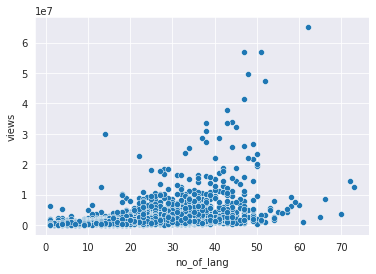

In [ ]:
sns.scatterplot(x=df_copy['no_of_lang'],y=df_copy['views'])

# No. of Topics

In [ ]:
df_copy['no_of_topics'] = df_copy['topics'].apply(len)

In [ ]:
df_copy['no_of_topics']

0        9
1       11
2        9
3        9
4        7
        ..
4000     7
4001     8
4002     5
4003    14
4004     8
Name: no_of_topics, Length: 4005, dtype: int64

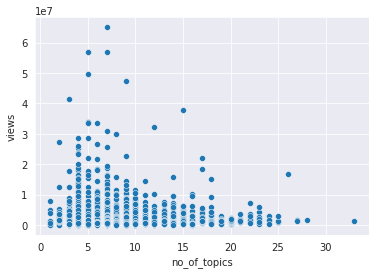

In [ ]:
sns.scatterplot(x=df_copy['no_of_topics'],y=df_copy['views'])

In [147]:
s = df_copy.apply(lambda x: pd.Series(x['topics']),axis = 1).stack().reset_index(level = 1, drop = True)
s.name = 'theme'
themes = df_copy.drop('topics', axis = 1).join(s)
themes['release_year'] = themes['release_year'].astype('int')
themes.head()

,talk_id,title,speaker_1,all_speakers,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,related_talks,url,description,transcript,occupation,release_day,release_month,release_year,months_ago,no_of_lang,no_of_topics,cleaned_description,cleaned_transcription,Event,theme
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,16.283333,"{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,Tuesday,June,2006,174,43,9,humor humanity exude an inconvenient truth al ...,thank chris truly great honor opportunity come...,TED,alternative energy
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,16.283333,"{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,Tuesday,June,2006,174,43,9,humor humanity exude an inconvenient truth al ...,thank chris truly great honor opportunity come...,TED,cars
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,16.283333,"{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,Tuesday,June,2006,174,43,9,humor humanity exude an inconvenient truth al ...,thank chris truly great honor opportunity come...,TED,climate change
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,16.283333,"{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,Tuesday,June,2006,174,43,9,humor humanity exude an inconvenient truth al ...,thank chris truly great honor opportunity come...,TED,culture
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,16.283333,"{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,Tuesday,June,2006,174,43,9,humor humanity exude an inconvenient truth al ...,thank chris truly great honor opportunity come...,TED,environment


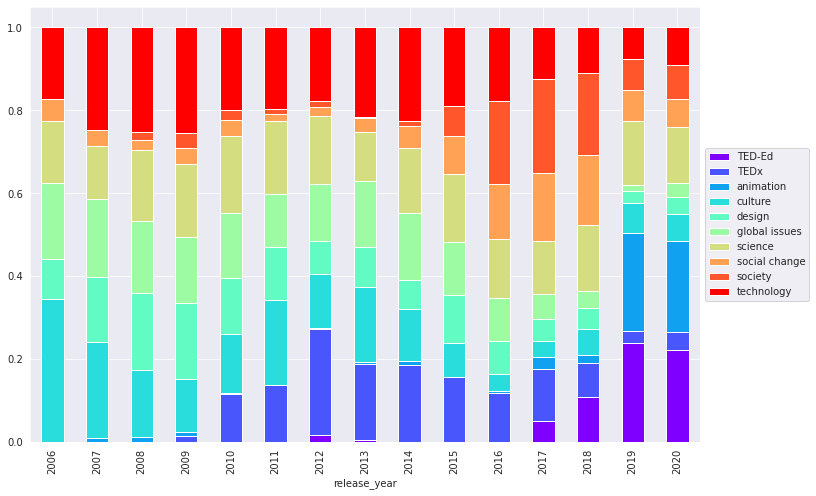

In [ ]:
s1 = themes[themes['theme'].isin(topics_df['index'].head(10))]
temp = pd.crosstab(s1['release_year'], s1['theme']).apply(lambda x: x/x.sum(), axis = 1)
temp.plot.bar(stacked = True, colormap = 'rainbow', figsize = (12, 8)).legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

In [ ]:
s1

,talk_id,title,speaker_1,all_speakers,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,related_talks,url,description,transcript,occupation,release_day,release_month,release_year,months_ago,no_of_lang,no_of_topics,theme
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,977,"{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,Tuesday,June,2006,174,43,9,culture
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,977,"{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,Tuesday,June,2006,174,43,9,global issues
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,977,"{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,Tuesday,June,2006,174,43,9,science
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,977,"{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,Tuesday,June,2006,174,43,9,technology
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"[ar, az, bg, bn, bs, cs, da, de, el, en, es, e...",628.0,1190,"{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",global health expert; data visionary,Tuesday,June,2006,174,49,11,global issues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,[en],NaN,257,{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ...",M,Thursday,April,2020,4,1,14,TED-Ed
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,[en],NaN,257,{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ...",M,Thursday,April,2020,4,1,14,animation
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,0,2020-04-30,2020-04-30,TED-Ed,en,[en],NaN,281,"{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...,M,Thursday,April,2020,4,1,8,TED-Ed
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,0,2020-

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

In [ ]:
words = ['ted', 'tedx', 'ed']
def clean_the_text(text):
  doc = nlp(text)

  lemmas = [token.lemma_ for token in doc]

  a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() and lemma not in stop_words]
  a_lemma_lower = [lemma.lower() for lemma in a_lemmas]
  lemmass = [lemma for lemma in a_lemma_lower if lemma not in words]

  return ' '.join(lemmass)

In [ ]:
df_copy['cleaned_description'] = df_copy['description'].apply(clean_the_text)

In [ ]:
df_copy['description'][0]

'With the same humor and humanity he exuded in "An Inconvenient Truth," Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.'

In [ ]:
df_copy['cleaned_description'][0]

'humor humanity exude an inconvenient truth al gore spell way individual address climate change immediately buy hybrid invent new hot brand global warming'

In [ ]:
#df_copy['topics'] = df_copy['topics'].astype(str)

In [ ]:
#df_copy['Topics'] = df_copy['topics'].apply(clean_the_text)

In [ ]:
#df_copy['topics'][1]

['Africa',
 'Asia',
 'Google',
 'demo',
 'economics',
 'global issues',
 'health',
 'statistics',
 'global development',
 'visualizations',
 'math']

In [ ]:
#df_copy['Topics'][1]

'africa asia google demo economic global issue health statistic global development visualization math'

In [ ]:
df_copy['duration'] = df_copy['duration'] / 60

In [ ]:
df_copy['duration'].value_counts().sort_index()

1.000000     1
1.300000     2
1.783333     1
1.816667     1
2.033333     1
            ..
58.383333    1
60.133333    1
62.333333    1
62.666667    1
65.366667    1
Name: duration, Length: 1188, dtype: int64

In [ ]:
df_copy[df_copy['duration'] < 2.0]

,talk_id,title,speaker_1,all_speakers,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,occupation,release_day,release_month,release_year,no_of_lang,no_of_topics,cleaned_description
2753,14610,"""Illusions for a better society""",Aaron Duffy,"{0: 'Aaron Duffy', 1: 'Lake Buckley', 2: 'Jack...",{0: 'Aaron Duffy began employing visual tricks...,10356,2018-04-13,2018-04-14,TED2018,en,[en],NaN,1.783333,"[visualizations, film]","{14609: '""Chromatic""', 14611: '""It\'s not amaz...",https://www.ted.com/talks/aaron_duffy_lake_buc...,Could visual illusions be a cure for polarizat...,Narrator: We have you here today specifically ...,M,Saturday,April,2018,1,2,could visual illusion cure polarization credit...
3502,42546,"""The Second Coming""",William Butler Yeats,{0: 'William Butler Yeats'},NaN,198694,2019-05-31,2019-05-31,TED-Ed,en,"[ar, en, es, fa, fr, he, hu, it, ja, ko, ku, m...",NaN,1.816667,"[animation, poetry, TED-Ed, writing, history, ...","{37985: '""First Kiss""', 42248: '""The Nutrition...",https://www.ted.com/talks/william_butler_yeats...,"This animation is part of the TED-Ed series, ""...","""The Second Coming"" by William Butler Yeats Tu...",M,Friday,May,2019,17,7,animation ted ed series poem feature animate i...
3516,42819,"""Three Months After""",Cristin O'Keefe Aptowicz,"{0: ""Cristin O'Keefe Aptowicz""}",NaN,133886,2019-06-07,2019-06-07,TED-Ed,en,"[ar, de, el, en, es, fa, fr, he, hu, id, it, j...",NaN,1.300000,"[animation, writing, TED-Ed, poetry, mental he...","{42248: '""The Nutritionist""', 42546: '""The Sec...",https://www.ted.com/talks/cristin_o_keefe_apto...,"This animation is part of the TED-Ed series, ""...","I'm Cristin O'Keefe Aptowicz and this is ""Thre...",M,Friday,June,2019,23,9,animation ted ed series poem feature animate i...
3554,42461,"""New Colossus""",Emma Lazarus,{0: 'Emma Lazarus'},NaN,142405,2019-07-02,2019-07-08,TED-Ed,en,"[ar, de, en, es, fa, fr, he, hu, it, ja, ko, k...",NaN,1.300000,"[animation, TED-Ed, poetry, writing, immigration]","{42464: '""To Make Use of Water""', 42819: '""Thr...",https://www.ted.com/talks/emma_lazarus_new_col...,"This animation is part of the TED-Ed series, ""...","""The New Colossus"" by Emma Lazarus Not like th...",M,Monday,July,2019,19,5,animation ted ed series poem feature animate i...
3623,42783,"""Ode to the Only Black Kid in the Class""",Clint Smith,{0: 'Clint Smith'},"{0: ""Clint Smith's work blends art and activis...",163277,2019-09-09,2019-09-09,TED-Ed,en,"[ar, el, en, es, fa, fr, he, id, it, ja, ko, k...",NaN,1.000000,"[TED-Ed, animation, poetry, race, inequality, ...","{41656: 'The Opposites Game', 42248: '""The Nut...",https://www.ted.com/talks/clint_smith_ode_to_t...,"This animation is part of the TED-Ed series, ""...","I'm Clint Smith and this is ""Ode to the Only B...",poet,Monday,Sep,2019,20,6,animation ted ed series poem feature animate i...


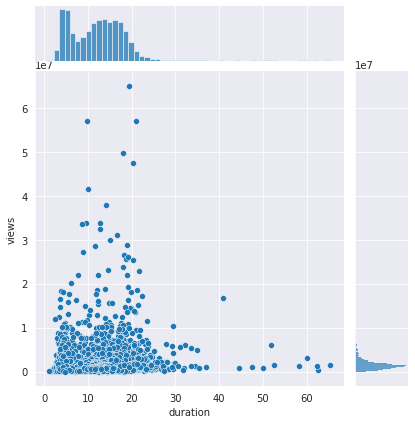

In [ ]:
sns.jointplot(x='duration', y='views', data=df_copy)
plt.xlabel('Duration')
plt.ylabel('Views')
plt.show()


In [90]:
df_copy['cleaned_transcription'] = df_copy['transcript'].apply(clean_the_text)

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(ngram_range=(1, 1), min_df = 0.05, max_df = 0.3)

In [93]:
vec_data1 = tfidf_vec.fit_transform(df_copy['cleaned_transcription'])

In [94]:
vec_data1.shape

(4005, 1314)

In [95]:
vec_data1.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06626479, 0.        , ..., 0.02228765, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.19990926, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [209]:
from sklearn.decomposition import NMF
model = NMF(n_components=11,random_state=8,l1_ratio=0.5, alpha=0.1)

In [210]:
W = model.fit_transform(vec_data1)

In [211]:
no_top_words = 5
no_topics = 11
H = []
for topic_id, topic in enumerate(model.components_):
    temp = pd.Series()
    for index in topic.argsort()[:-no_top_words - 1:-1]:
        temp[tfidf_vec.get_feature_names()[index]] = topic[index]
    H.append(temp)

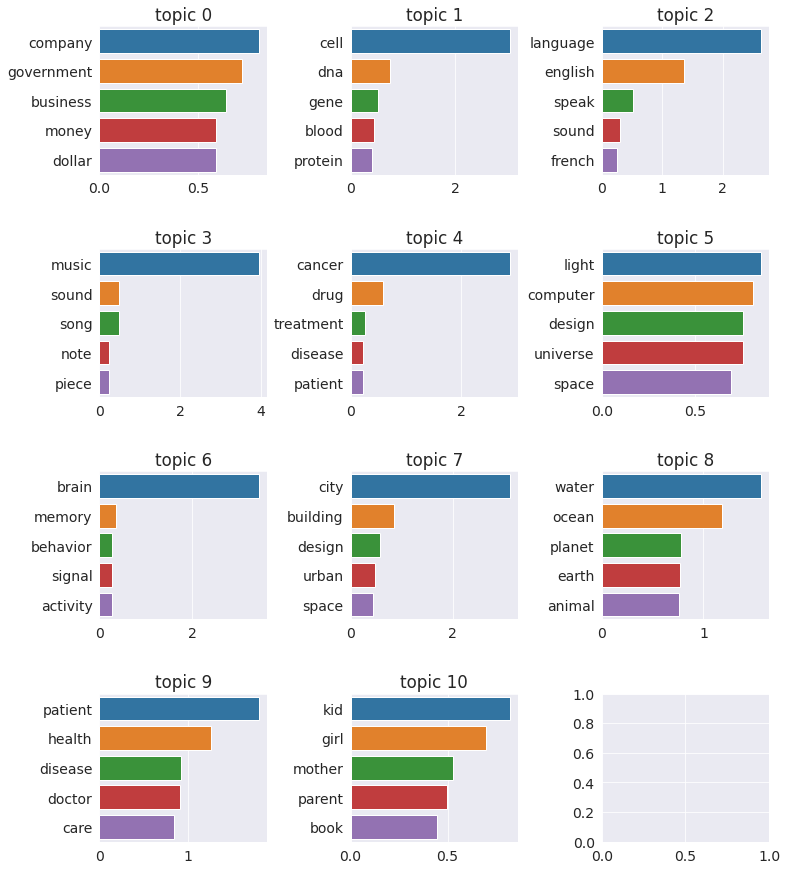

In [213]:
fig, ax = plt.subplots(figsize=(12, 15), ncols=3, nrows=4)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(11):
    sns.barplot(x = H[i].values, y = H[i].index, ax = ax[int(i/3)][i%3]).set_title('topic ' + str(i))
plt.show()

In [214]:
for i,topic in enumerate(model.components_):
    print(f'Top 15 words for topic #{i}:')
    print([tfidf_vec.get_feature_names()[i]for i in topic.argsort()[-10:]])
    print('\n')

Top 15 words for topic #0:
['economic', 'global', 'market', 'economy', 'africa', 'dollar', 'money', 'business', 'government', 'company']


Top 15 words for topic #1:
['bone', 'genetic', 'disease', 'molecule', 'organ', 'protein', 'blood', 'gene', 'dna', 'cell']


Top 15 words for topic #2:
['letter', 'book', 'speech', 'sentence', 'translate', 'french', 'sound', 'speak', 'english', 'language']


Top 15 words for topic #3:
['oh', 'audience', 'video', 'listen', 'dance', 'piece', 'note', 'song', 'sound', 'music']


Top 15 words for topic #4:
['medicine', 'trial', 'detect', 'protein', 'molecule', 'patient', 'disease', 'treatment', 'drug', 'cancer']


Top 15 words for topic #5:
['object', 'datum', 'image', 'robot', 'machine', 'space', 'universe', 'design', 'computer', 'light']


Top 15 words for topic #6:
['stress', 'cause', 'mental', 'control', 'sleep', 'activity', 'signal', 'behavior', 'memory', 'brain']


Top 15 words for topic #7:
['park', 'neighborhood', 'architecture', 'community', 'str

In [ ]:
#(rows, cols) = W.shape
#for i in range(rows):
 #   for j in range(cols):
  #      df_copy.loc[i, 'topic '+ str(j)] = W[i, j]

In [194]:
topic_values = model.transform(vec_data1)
df_copy['Topic_Cluster'] = topic_values.argmax(axis=1)

In [219]:
cat_dict = {0:'History, art and culture',
            1:'Environment,ecology and climate',
            2:'Finance, economics and business',
            3:'Architecture, design and engineering',
            4:'Music and entertainment',
            5:'Society and social',
            6:'Global issues',
            7:'Health',
            8:'Science and technology',
            9:'Future and innovation',
            10:'Education and animation'
}

In [220]:
df_copy['talk_category'] = df_copy['Topic_Cluster'].map(cat_dict)

# Events

In [101]:
def ted_cat(event):
  if event[0:4] == 'TED-' in event:
      return 'TED-Ed'
  elif event[0:4] == 'TEDx' in event:
      return 'TEDx'
  elif event[0:4] == 'TEDW' in event:
      return 'TEDWomen'
  elif event[0:4] == 'TEDS' in event:
      return 'TEDSalon'
  elif event[0:4] == 'TED2' in event:
      return 'TED'
  elif event[0:4] == 'TEDG' in event:
      return 'TEDGlobal'
  elif event[0:4] == 'TEDM' in event:
      return 'TEDMED'
  else:
      return 'Others'

In [102]:
df_copy['Event'] = df_copy['event'].apply(ted_cat)

In [103]:
df_copy

,talk_id,title,speaker_1,all_speakers,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,occupation,release_day,release_month,release_year,months_ago,no_of_lang,no_of_topics,cleaned_description,cleaned_transcription,Event
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,16.283333,"[alternative energy, cars, climate change, cul...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,Tuesday,June,2006,174,43,9,humor humanity exude an inconvenient truth al ...,thank chris truly great honor opportunity come...,TED
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"[ar, az, bg, bn, bs, cs, da, de, el, en, es, e...",628.0,19.833333,"[Africa, Asia, Google, demo, economics, global...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",global health expert; data visionary,Tuesday,June,2006,174,49,11,datum present like drama urgency sportscaster ...,year ago task teach global development swedish...,TED
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"[ar, bg, de, el, en, es, fa, fr, he, hr, hu, i...",124.0,21.433333,"[computers, entertainment, interface design, m...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",technology columnist,Tuesday,June,2006,174,26,9,new york times columnist david pogue aim techn...,music sound silence simon garfunkel hello voic...,TED
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"[ar, bg, bn, ca, cs, de, en, es, fa, fi, fr, h...",219.0,18.600000,"[MacArthur grant, activism, business, cities, ...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,activist for environmental justice,Tuesday,June,2006,174,35,9,emotionally charge talk macarthur win activist...,today happy hear sustainable development save ...,TED
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"[af, ar, az, be, bg, bn, ca, cs, da, de, el, e...",4931.0,19.400000,"[children, creativity, culture, dance, educati...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,author,Tuesday,June,2006,174,62,7,sir ken robinson entertaining profoundly case ...,good morning audience good great blow away thi...,TED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,[en],6.0,11.500000,"[activism, data, technology, mental health, so...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in

In [105]:
df_copy['Event'].value_counts()

TED          1178
TEDx          696
Others        622
TED-Ed        561
TEDGlobal     516
TEDWomen      194
TEDSalon      146
TEDMED         92
Name: Event, dtype: int64

# Topics

In [106]:
publish_year = []
for i in range(df_copy.shape[0]):
  publish_year.append(df_copy['release_year'][i])

In [118]:
from collections import Counter

all_tags = []
for i in range(0, df_copy.shape[0]):
    string_tags = df_copy['topics'][i].strip().replace("'", "")[1:-1].split(',')
    all_tags.append(string_tags)

d_year_tags = zip(publish_year, all_tags)


tags_dict = dict()
for i in range(0, len(list(d_year_tags))):
    year = publish_year[i]
    tags = all_tags[i]
    if year in tags_dict:
        # append the new number to the existing array at this slot
        tags_dict[year].append(tags)
    else:
        # create a new array in this slot
        tags_dict[year] = [tags]
        
for year, tagsLists in tags_dict.items(): 
    flat_list = []
    for tagsList in tagsLists:
        for tag in tagsList:
            flat_list.append(tag)
    tags_dict[year] = flat_list
        
for year, tagsLists in tags_dict.items(): 
    tags_dict[year] = Counter(tagsLists).most_common(10)

In [122]:
tags_dict

{2006: [(' culture', 27),
  (' global issues', 17),
  (' technology', 16),
  (' science', 14),
  (' entertainment', 10),
  ('business', 10),
  (' design', 9),
  (' invention', 8),
  (' performance', 7),
  (' collaboration', 6)],
 2007: [(' technology', 54),
  (' culture', 41),
  (' global issues', 41),
  (' design', 29),
  (' science', 28),
  (' entertainment', 23),
  ('business', 16),
  (' performance', 15),
  (' business', 14),
  (' invention', 14)],
 2008: [(' technology', 76),
  (' design', 54),
  (' science', 52),
  (' global issues', 51),
  (' entertainment', 47),
  (' culture', 36),
  (' humor', 23),
  (' Best of the Web', 22),
  ('business', 20),
  (' music', 17)],
 2009: [(' technology', 78),
  (' science', 54),
  (' design', 47),
  (' global issues', 44),
  (' entertainment', 28),
  (' culture', 27),
  ('business', 20),
  (' environment', 20),
  ('art', 19),
  (' creativity', 19)],
 2010: [(' technology', 63),
  (' science', 59),
  (' global issues', 44),
  (' design', 41),
 

In [124]:
import collections

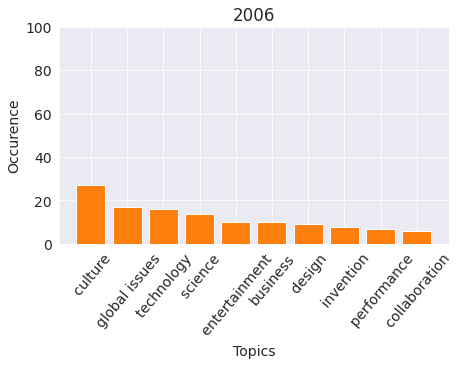

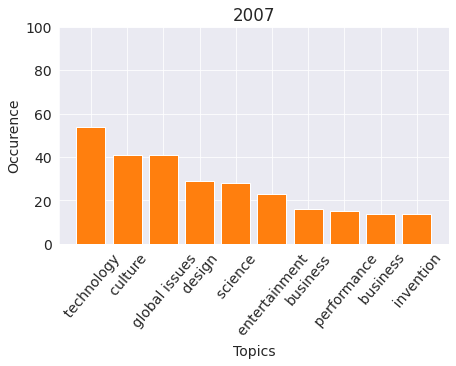

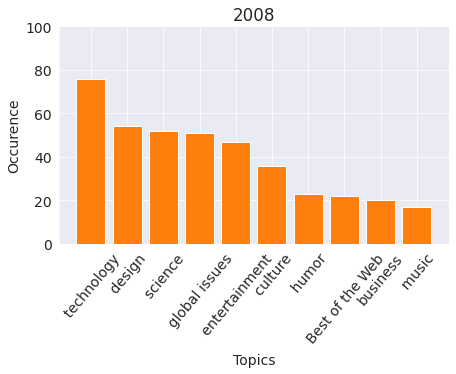

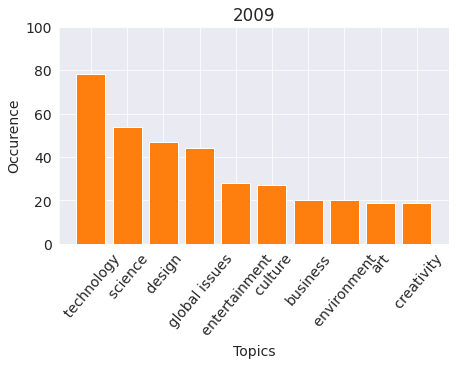

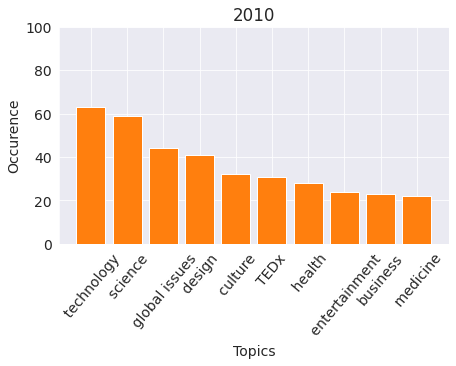

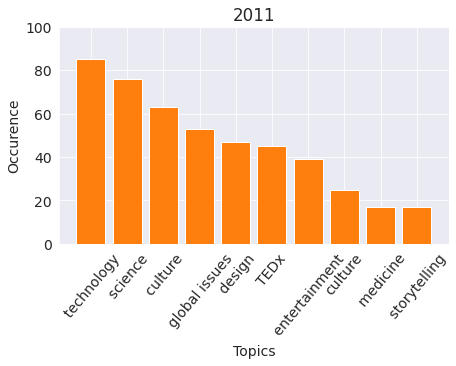

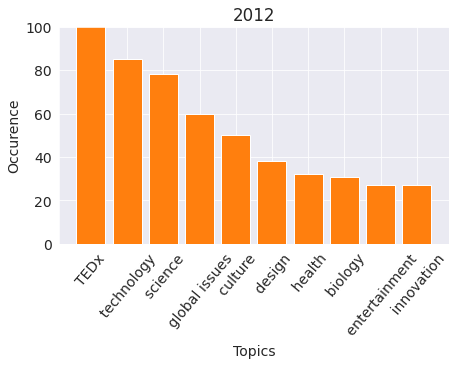

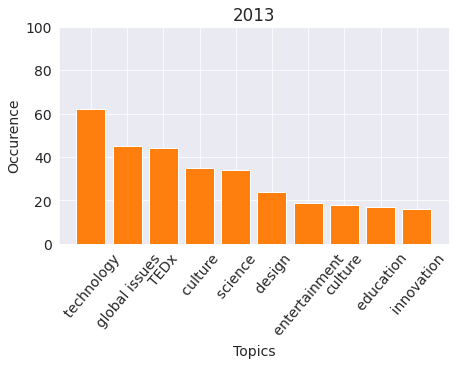

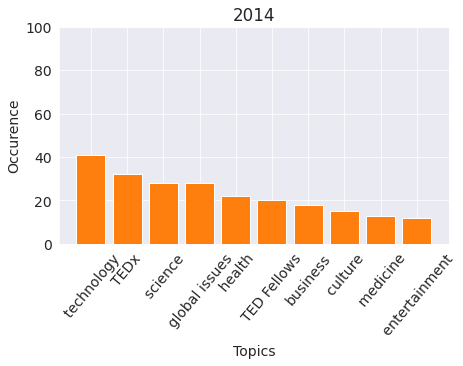

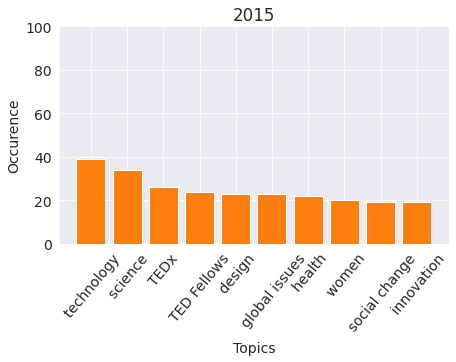

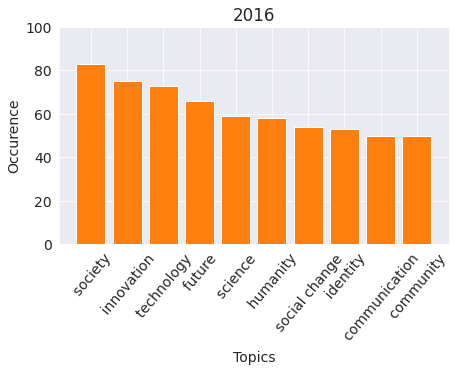

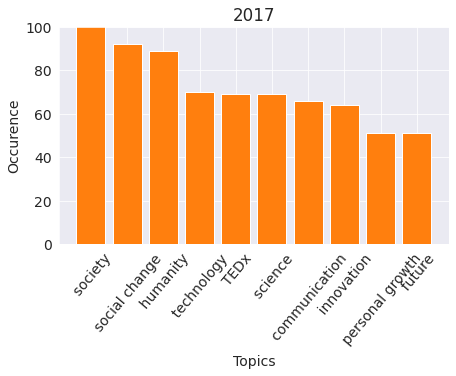

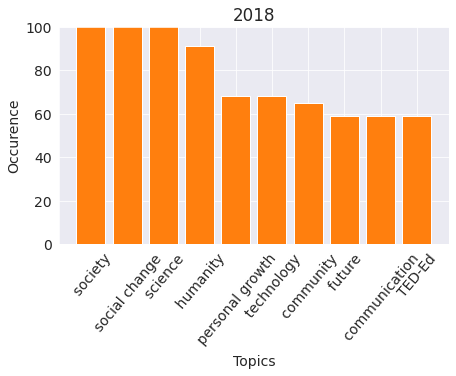

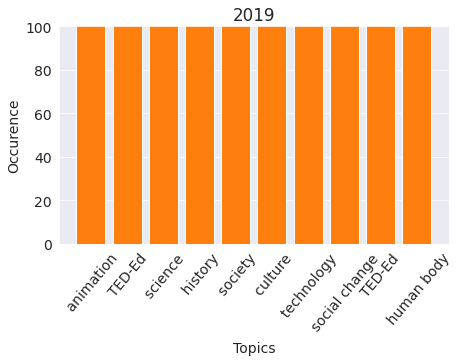

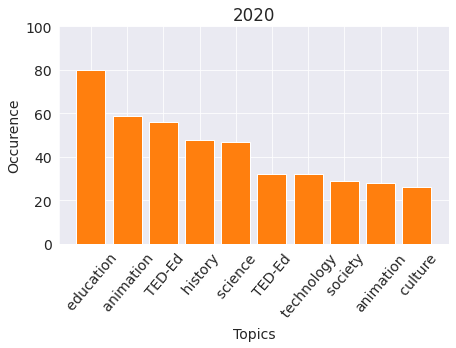

In [140]:
od = collections.OrderedDict(sorted(tags_dict.items()))
tagData = od

for year, values in tagData.items():
    tags_counter = list(zip(*values))   
    X = list(tags_counter[0])
    Y = list(tags_counter[1])
    plt.bar(X,Y)   
    plt.xlabel('Topics')
    plt.ylabel('Occurence')
    plt.title(str(year))
    plt.bar(*tags_counter)
    plt.xticks(range(len(Y)),rotation=50)
    plt.ylim(0, 100)
    plt.show()

In [177]:
year_topic = themes.groupby(['theme','release_year']).agg({'theme':'count','views':'mean'})
year_topic = year_topic.rename(columns={year_topic.columns[0]: "No. of times topics discussed"})
#year_topic = year_topic.sort_values(by='No. of times topics discussed',ascending=False)
pd.set_option("display.max_rows", None, "display.max_columns", None)
year_topic

No. of times topics discussed  \
theme                    release_year                                  
3D printing              2008                                      1   
                         2012                                      1   
                         2013                                      1   
                         2014                                      2   
                         2015                                      3   
                         2016                                      1   
                         2018                                      1   
                         2019                                      2   
AI                       2007                                      2   
                         2008                                      1   
                         2010                                      2   
                         2011                                      4   
                         2012                                      6   
                         2013                                      1   
                         2014                                      5   
                         2015                                      3   
                         2016                                      6   
                         2017                                     17   
                         2018                                     13   
                         2019                                     14   
                         2020                                      2   
AIDS                     2006                                      1   
                         2007                                      2   
                         2008                                      1   
                         2009                                      2   
                         2010                                      4   
                         2012                                      2   
                         2013                                      1   
                         2015                                      1   
                         2016                                      1   
                         2017                                      2   
                         2019                                      1   
Africa                   2006                                      2   
                         2007                                     15   
                         2008                                     15   
                         2009                                      9   
                         2010                                      7   
                         2011                                      3   
                         2012                                      4   
                         2013                                     11   
                         2014                                      3   
                         2015                                      2   
                         2016                                     14   
                         2017                                     29   
                         2018                                     33   
                         2019                                     12   
                         2020                                      5   
Alzheimer's              2008                                      1   
                         2012                                      1   
                         2013                                      1   
                         2014                                      1   
                         2015                                      1   
                         2017                                      1   
                         2019                                      3   
Antarct

In [186]:
year_topic1 = themes.groupby('theme').agg({'release_year':'nunique','theme':'count','views':'mean'})
year_topic1 = year_topic1.rename(columns={year_topic1.columns[0]: "No. of years topic release",year_topic1.columns[1]: "No. of times topics discussed"})
year_topic1 = year_topic1.sort_values(by='No. of times topics discussed',ascending=False)
pd.set_option("display.max_rows", None, "display.max_columns", None)
year_topic1

,No. of years topic release,No. of times topics discussed,views
theme,,,
science,15,993,2.072878e+06
technology,15,979,1.818735e+06
culture,15,680,2.707667e+06
TEDx,12,581,2.078380e+06
global issues,15,574,1.642566e+06
TED-Ed,6,563,2.046148e+06
society,13,557,1.927572e+06
design,15,518,1.705607e+06
social change,15,512,1.922959e+06


In [221]:
year_topic2 = df_copy.groupby('talk_category').agg({'release_year':'nunique','talk_category':'count','views':'mean'})
year_topic2 = year_topic2.rename(columns={year_topic2.columns[0]: "No. of years topic release",year_topic2.columns[1]: "No. of times topics discussed"})
year_topic2 = year_topic2.sort_values(by='No. of times topics discussed',ascending=False)
pd.set_option("display.max_rows", None, "display.max_columns", None)
year_topic2

,No. of years topic release,No. of times topics discussed,views
talk_category,,,
"History, art and culture",15,1167,2.784142e+06
Society and social,15,654,1.994989e+06
"Finance, economics and business",15,644,1.865507e+06
"Environment,ecology and climate",15,423,1.512915e+06
Music and entertainment,15,243,1.683415e+06
Science and technology,15,223,1.766600e+06
Global issues,15,192,3.259092e+06
Health,15,162,1.372860e+06
Future and innovation,15,160,1.697686e+06


In [208]:
df_copy.head()

,talk_id,title,speaker_1,all_speakers,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,occupation,release_day,release_month,release_year,months_ago,no_of_lang,no_of_topics,cleaned_description,cleaned_transcription,Event,Topic_Cluster,talk_category
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,16.283333,"[alternative energy, cars, climate change, cul...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,Tuesday,June,2006,174,43,9,humor humanity exude an inconvenient truth al ...,thank chris truly great honor opportunity come...,TED,5,Society and social
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"[ar, az, bg, bn, bs, cs, da, de, el, en, es, e...",628.0,19.833333,"[Africa, Asia, Google, demo, economics, global...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",global health expert; data visionary,Tuesday,June,2006,174,49,11,datum present like drama urgency sportscaster ...,year ago task teach global development swedish...,TED,5,Society and social
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"[ar, bg, de, el, en, es, fa, fr, he, hr, hu, i...",124.0,21.433333,"[computers, entertainment, interface design, m...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",technology columnist,Tuesday,June,2006,174,26,9,new york times columnist david pogue aim techn...,music sound silence simon garfunkel hello voic...,TED,2,"Finance, economics and business"
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"[ar, bg, bn, ca, cs, de, en, es, fa, fi, fr, h...",219.0,18.600000,"[MacArthur grant, activism, business, cities, ...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,activist for environmental justice,Tuesday,June,2006,174,35,9,emotionally charge talk macarthur win activist...,today happy hear sustainable development save ...,TED,7,Health and Education
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"[af, ar, az, be, bg, bn, ca, cs, da, de, el, e...",4931.0,19.400000,"[children, creativity, culture, dance, educati...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,author,Tuesday,June,2006,174,62,7,sir ken robinson entertaining profoundly case ...,good morning audience good great blow away thi...,TED,0,"History, art and culture"


In [ ]:
df_copy.groupby('event')['views'].mean()

event
Others       1.613303e+06
TED          2.518750e+06
TED-Ed       2.050433e+06
TEDGlobal    2.289625e+06
TEDMED       2.160084e+06
TEDSalon     2.154631e+06
TEDWomen     1.857954e+06
TEDx         2.049876e+06
Name: views, dtype: float64

In [ ]:
df_copy['speaker_1'].value_counts()

Alex Gendler         34
Iseult Gillespie     19
Emma Bryce           12
Daniel Finkel        11
Alex Rosenthal       10
                     ..
Pardis Sabeti         1
Keith Chen            1
Ramona Pierson        1
Jennifer Verduin      1
Judy Cebra-Thomas     1
Name: speaker_1, Length: 3274, dtype: int64

In [ ]:
df_copy.groupby('speaker_1')['views'].mean()

speaker_1
 BLACK                    14110467.0
 Beardyman                 2627006.0
 Bono                      1370608.5
 British Paraorchestra      106545.0
 Crush Club                 168740.0
                             ...    
Zubaida Bai                 979502.0
eL Seed                    1272091.0
iO Tillett Wright          2978971.0
tobacco brown              1300536.0
Özlem Cekic                1862374.0
Name: views, Length: 3274, dtype: float64

In [ ]:
df_copy['speaker_1'] = df_copy['speaker_1'].map(df_copy.groupby(['speaker_1'])['views'].mean().to_dict())

In [ ]:
df_copy['speaker_1'] = np.log(df_copy['speaker_1'])

In [ ]:
df_copy['event'] = np.log(df_copy['event'])

In [ ]:
df_copy['views'] = np.log(df_copy['views'])

In [ ]:
df_copy

,talk_id,title,speaker_1,all_speakers,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,occupation,release_day,release_month,release_year,months_ago,no_of_lang,no_of_topics,cleaned_description,cleaned_transcription,talk_category,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9,topic 10,topic 11,topic 12,topic 13,topic 14
0,1,Averting the climate crisis,14.599686,{0: 'Al Gore'},{0: 'Nobel Laureate Al Gore focused the world’...,15.074935,2006-02-25,2006-06-27,14.739273,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,16.283333,"[alternative energy, cars, climate change, cul...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",climate advocate,Tuesday,June,2006,174,43,9,humor humanity exude an inconvenient truth al ...,thank chris truly great honor opportunity come...,Music and Entertainment,0.024748,0.026786,0.011507,0.000000,0.000000,0.075214,0.000000,0.016407,0.000000,0.000000,0.000000,0.0,0.000000,0.013269,0.011331
1,92,The best stats you've ever seen,15.198589,{0: 'Hans Rosling'},"{0: 'In Hans Rosling’s hands, data sings. Glob...",16.489775,2006-02-22,2006-06-27,14.739273,en,"[ar, az, bg, bn, bs, cs, da, de, el, en, es, e...",628.0,19.833333,"[Africa, Asia, Google, demo, economics, global...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",global health expert; data visionary,Tuesday,June,2006,174,49,11,datum present like drama urgency sportscaster ...,year ago task teach global development swedish...,Music and Entertainment,0.000000,0.027108,0.000000,0.000000,0.018641,0.110775,0.000000,0.000000,0.000000,0.000000,0.023582,0.0,0.000000,0.000000,0.000000
2,7,Simplicity sells,14.583853,{0: 'David Pogue'},{0: 'David Pogue is the personal technology co...,14.468269,2006-02-24,2006-06-27,14.739273,en,"[ar, bg, de, el, en, es, fa, fr, he, hr, hu, i...",124.0,21.433333,"[computers, entertainment, interface design, m...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",technology columnist,Tuesday,June,2006,174,26,9,new york times columnist david pogue aim techn...,music sound silence simon garfunkel hello voic...,"Science, technology and innovation",0.026754,0.093379,0.000000,0.020149,0.000000,0.016366,0.000000,0.000000,0.000000,0.000206,0.000000,0.0,0.000000,0.000000,0.000000
3,53,Greening the ghetto,14.498310,{0: 'Majora Carter'},{0: 'Majora Carter redefined the field of envi...,14.795365,2006-02-26,2006-06-27,14.739273,en,"[ar, bg, bn, ca, cs, de, en, es, fa, fi, fr, h...",219.0,18.600000,"[MacArthur grant, activism, business, cities, ...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,activist for environmental justice,Tuesday,June,2006,174,35,9,emotionally charge talk macarthur win activist...,today happy hear sustainable development save ...,Environment and ecology,0.032738,0.000000,0.004803,0.000000,0.002100,0.070756,0.000000,0.102122,0.000000,0.000000,0.008191,0.0,0.000000,0.015705,0.012519
4,66,Do schools kill creativity?,17.152235,{0: 'Sir Ken Robinson'},"{0: ""Creativity expert Sir Ken Robinson challe...",17.990697,2006-02-25,2006-06-27,14.739273,en,"[af, ar, az, be, bg, bn, ca, cs, da, de, el, e...",4931.0,19.400000,"[children, creativity, culture, dance, educati...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,S

In [ ]:
X = df_copy[['speaker_1', 'event', 'duration', 'months_ago', 'no_of_lang', 'no_of_topics', 'topic 0', 'topic 1', 'topic 2', 'topic 3', 'topic 4', 'topic 5', 
          'topic 6', 'topic 7', 'topic 8', 'topic 9', 'topic 10',
          'topic 11', 'topic 12', 'topic 13', 'topic 14']]

In [ ]:
df_copy['event']

0       14.739273
1       14.739273
2       14.739273
3       14.739273
4       14.739273
          ...    
4000    14.739273
4001    14.533562
4002    14.533290
4003    14.533562
4004    14.533562
Name: event, Length: 4005, dtype: float64

In [ ]:
y = df_copy['views']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
scaler = MinMaxScaler()
X_train[['speaker_1'	,'event',	'duration',	'months_ago',	'no_of_lang',	'no_of_topics']] = scaler.fit_transform(X_train[['speaker_1'	,'event',	'duration',	'months_ago',	'no_of_lang',	'no_of_topics']])
X_test[['speaker_1'	,'event',	'duration',	'months_ago',	'no_of_lang',	'no_of_topics']] = scaler.transform(X_test[['speaker_1'	,'event',	'duration',	'months_ago',	'no_of_lang',	'no_of_topics']])

ValueError: ignored

In [ ]:
X_train

,speaker_1,event,duration,months_ago,no_of_lang,no_of_topics,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9,topic 10,topic 11,topic 12,topic 13,topic 14
3296,14.797671,14.585658,14.900000,15,20,9,0.044744,0.025290,0.000000,0.000000,0.010493,0.036610,0.004116,0.000000,0.000000,0.000000,0.026097,0.000000,0.000000,0.000000,0.000000
2450,14.251698,14.739273,11.616667,44,26,7,0.050869,0.001253,0.000000,0.000000,0.013520,0.046723,0.018495,0.000000,0.000000,0.000985,0.000000,0.000000,0.000000,0.001400,0.000843
1832,14.750590,14.533290,19.750000,84,26,7,0.000000,0.110343,0.000000,0.000000,0.012197,0.000000,0.000000,0.000000,0.000000,0.000000,0.002871,0.000000,0.008114,0.000000,0.000000
156,14.129691,14.583130,15.966667,167,24,7,0.007611,0.029503,0.000000,0.000000,0.000848,0.041196,0.000000,0.000000,0.032845,0.000000,0.000000,0.000000,0.000000,0.039214,0.019710
195,13.861472,14.739273,15.900000,147,24,8,0.000000,0.080001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002643,0.103327,0.000000,0.001099,0.000000,0.020396,0.011840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,13.193532,14.434987,10.216667,110,30,2,0.043887,0.009906,0.020396,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.001708,0.000000,0.000000,0.032156,0.000000
3264,15.756387,14.533562,3.700000,15,23,6,0.011326,0.016800,0.000000,0.000000,0.000000,0.009533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1653,14.040666,14.739273,33.500000,75,23,6,0.021927,0.044477,0.000000,0.000000,0.000000,0.093911,0.000326,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2607,15.124793,14.293794,14.333333,48,23,8,0.048908,0.003609,0.000000,0.000000,0.003500,0.001346,0.009309,0.000000,0.000000,0.000000,0.000000,0.000000,0.025489,0.000000,0.004166
